Dataset Description:
    
In this study, we will try to see if we can predict the Avocado’s Average Price based on different features.

The variables of the dataset are the following:

Categorical: 'region','type'

Date: 'Date'

Numerical:'No','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','Year'

Target:'AveragePrice'

In [47]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [48]:
#Loading the dataset
df=pd.read_csv('avocado.csv')

In [49]:
df.head()

,No,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


The Feature "No" is just a representation of the indexes, so its of no use,we can remove it.

In [50]:
df.drop('No',axis=1,inplace=True)

In [51]:
#Lets check our data head again to make sure that the Feature 'No' is removed
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [52]:
#Checking the info() method to get an a general idea about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


We dont have any null values in the dataset and the datatypes are also obtained.

In [53]:
#Lets check the shape of the dataset for a clear view
df.shape

(18249, 13)

There are 18249 rows and 13 columns

Now let's do some Feature Engineering on the Date Feature so that we can be able to use the day and the month columns in building our machine learning model later.I didn't mention the year because its already there in the dataframe.

In [54]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [55]:
#Lets check our data head to check the changes we made
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [56]:
#Now we can drop the column'Date' as there are 'Day','Month' and 'year' columns present separately.
df.drop('Date',axis=1,inplace=True)

In [57]:
#Lets check the data head again
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [58]:
#Lets check the shape of the dataframe
df.shape

(18249, 14)

Rows=18249

Columns=14

In [59]:
#Lets check the datatypes
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
Day               int64
dtype: object

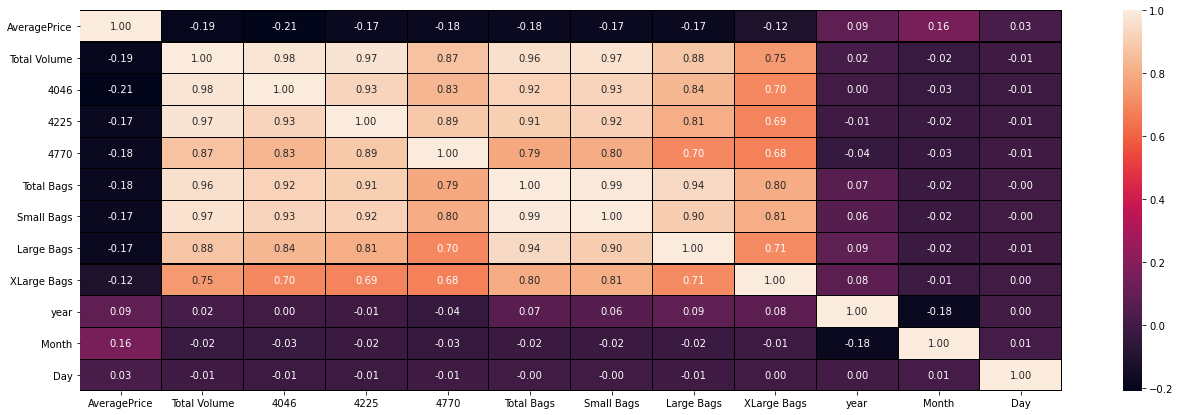

In [60]:
#Checking correlation with the target column
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

As we can see from the heatmap above, all the Features are not correlated with the AveragePrice column, instead most of them are correlated with each other. 

First we have to do some Feature Engineering on the categorical Features : region and type

In [61]:
df['region'].nunique()

54

In [62]:
df['type'].nunique()

2

Now,I will use LabelEncoder to encode the object column 'type' and 'region'.

In [63]:
#Encoding the column'type'
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['type']=LE.fit_transform(df['type'])

In [64]:
df['region']=LE.fit_transform(df['region'])

In [65]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [66]:
df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53,1,7


conventional--0
organic--1

In [67]:
#Checking the datatypes after encoding
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
Day               int64
dtype: object

In [68]:
#Describing the dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,12.000000,31.000000


Above statistics data show that there are multiple outliers mostly in XLargeBags.

Most of the column statistics data are near to 0 values.

By checking the difference between the 75% and max value there are outliers in some of the columns.

Data Visualization:

In this portion we can plot different graph using different columns and try to visualize the data using matplotlib and seaborn library.

Different graphs include:

Bar plot

Count plot

Line plot

Histogram and Pair plot

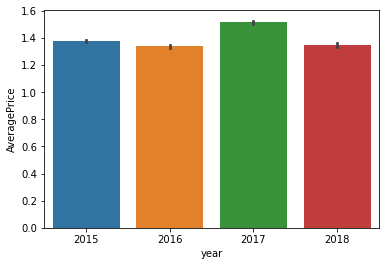

In [69]:
#Checking ratio of year and price that which year has maximum average price
sns.barplot(x='year',y='AveragePrice',data=df)

In 2017,the AveragePrice is maximum.

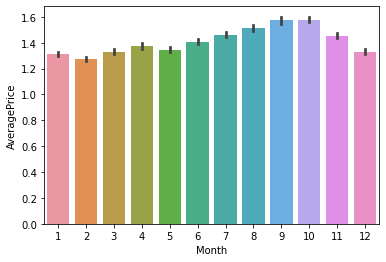

In [70]:
#Checking ratio of month and price that which year has maximum average price
sns.barplot(x='Month',y='AveragePrice',data=df)

From the above plots,we came to know that:

Year 2017 is that year where the price is maximum as compared to other year, and there is less difference among rest of the year.

September and October are the month where max no of average price is there, but the thing is almost for whole year the price is almost same for the avocado this prove that there is so much craze of avocado rather than India.

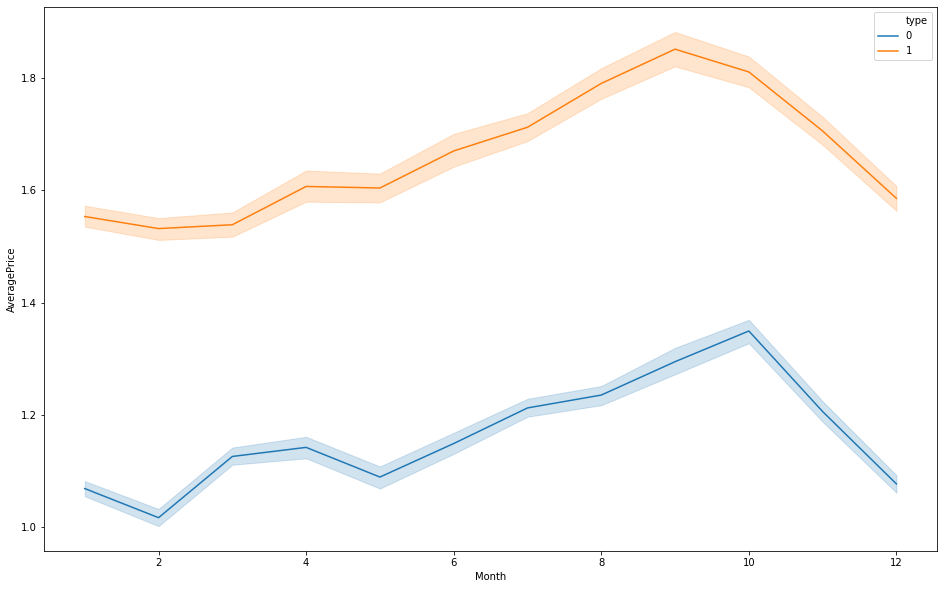

In [71]:
plt.figure(figsize=(16,10))
sns.lineplot(x='Month',y='AveragePrice',hue='type',data=df)

From the above graph:

There is a hike in between the month 8–10 in both the types of avocado(conventional and organic).

Also, the conventional type of avocado is varying in terms of price as seen in line plot because in starting the price is high but then it got decreased and so on.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008542DA7AC0>,
      dtype=object)

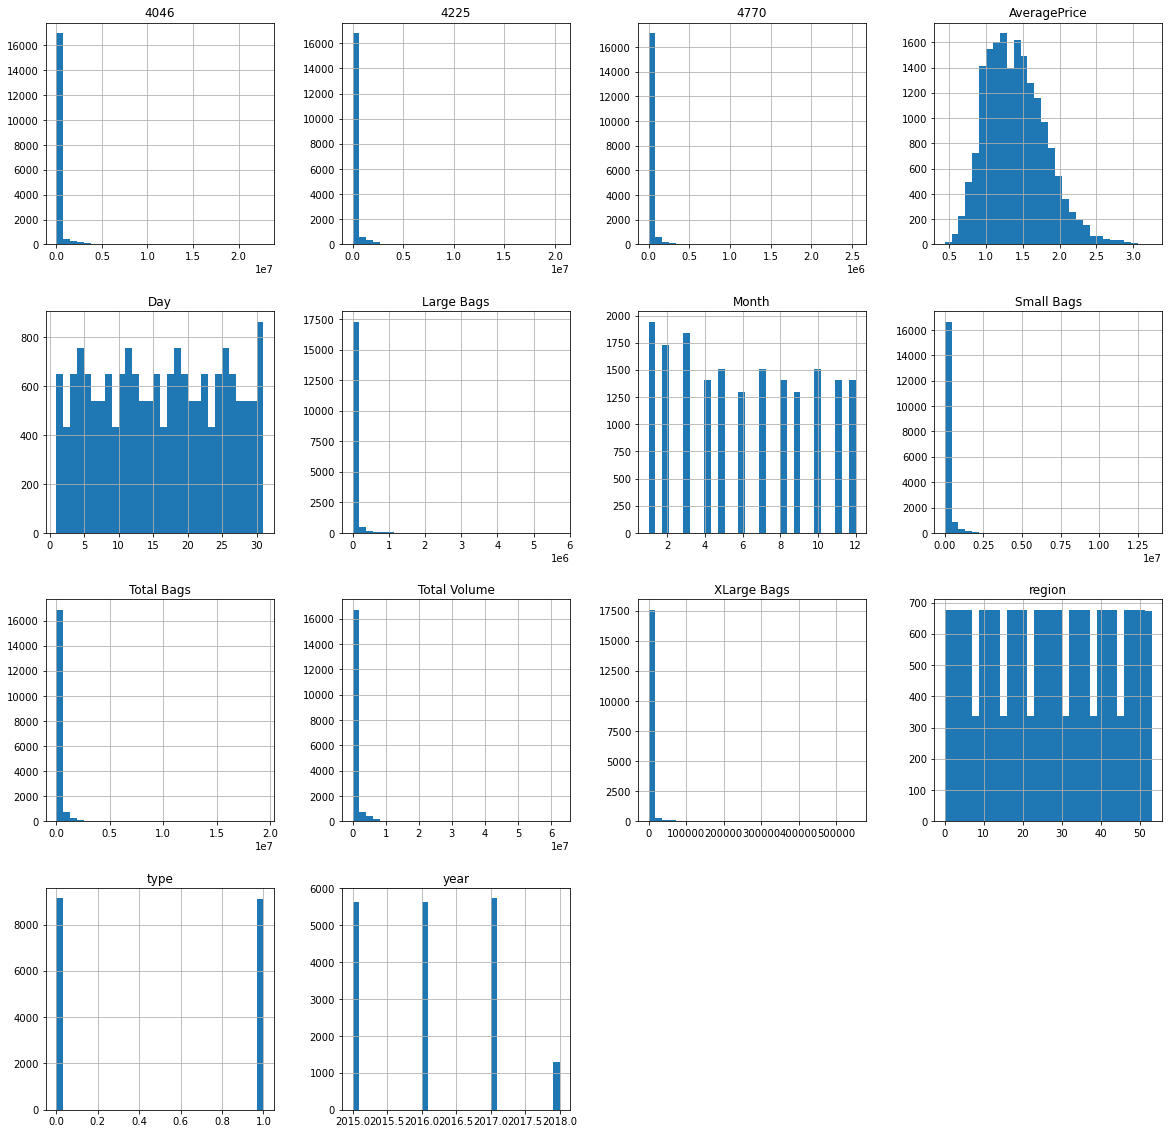

In [72]:
#Plotting histogram
#A histogram shows the frequency on the vertical axis and the horizontal axis in another dimension. 
# In this graph, we can also check whether the graph is right skewed, left skewed or the graph is normally distributed graph
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

Average price column is normally distributing over the histogram.

Rest of the data are not much varying in term of numbers, so they are almost left skewed data

To make the column as normal distributed we can use different methods, but I will be using numPylog to make the skewed values as normally distributed.


In [73]:
#Checking skewness
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

In [74]:
#Removing skewness
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [75]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
Day             0.014310
dtype: float64

The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero

Note: Making the skewness value near to zero will help to get better score.

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
type            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
region          AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Month            AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Day             AxesSubplot(0.606034,0.321957;0.133621x0.16413)
dtype: object

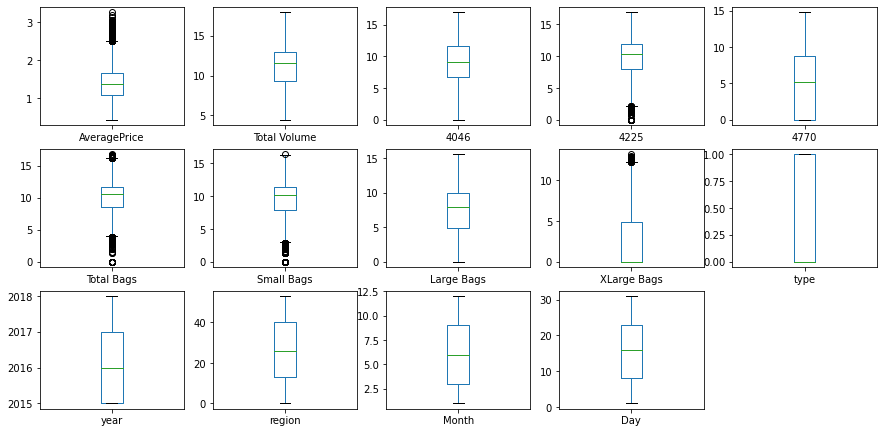

In [76]:
#Checking outliers using boxplots
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

From above image we can clearly see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.

Now we will remove them using zscore

In [77]:
#Applying zscore
z=np.abs(zscore(df))
print(z)

[[0.18868864 0.10728205 0.60975177 ... 1.7002522  1.64763162 1.29185687]
 [0.13901962 0.1759487  0.73770703 ... 1.7002522  1.64763162 0.49423066]
 [1.18206895 0.15869039 0.68884013 ... 1.7002522  1.64763162 0.30339555]
 ...
 [1.15237477 0.77890112 0.56825116 ... 1.70081131 1.46495942 0.60817726]
 [1.30138182 0.70779758 0.49440715 ... 1.70081131 1.46495942 0.18944895]
 [0.53151208 0.67454176 0.30415101 ... 1.70081131 1.46495942 0.98707516]]


In [78]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))
(18249, 14)


In [79]:
#Assign the value to df_new which are less than threshold value and removing outliers
df_new=df[(z<3).all(axis=1)]

In [80]:
print(df.shape)
print(df_new.shape)
df=df_new
print('Shape after removing outliers:',df.shape)

(18249, 14)
(17834, 14)
Shape after removing outliers: (17834, 14)


In [81]:
#%data loss calculation
loss_percent=(18249-17834)/18249*100
print(loss_percent)

2.2740972108060715


2% data is lost after removing outliers and this is quite good.

In [82]:
#Splitting the independent and target variable in x and y
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [83]:
#Using StandardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [84]:
#Using multiple Algorithms for calculating the best algo which suits best for our data set
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score=0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        r2_sc=r2_score(test_y,pre)
        print('r2 score correspond to random state',r_state,'is',r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i
print()
print()
print()
print()
print('max r2 score correspond to random state',final_state,'is',max_r2_score,'and model is',final_model)

r2 score correspond to random state 40 is 0.7345412409288717
r2 score correspond to random state 40 is 0.7898907426803986
r2 score correspond to random state 40 is 0.5529132036795158
r2 score correspond to random state 40 is 0.5640573161217686
r2 score correspond to random state 40 is 0.7366264683393939
r2 score correspond to random state 41 is 0.744135753484
r2 score correspond to random state 41 is 0.7859996972556917
r2 score correspond to random state 41 is 0.5604729694398805
r2 score correspond to random state 41 is 0.58071186439988
r2 score correspond to random state 41 is 0.7520590847233756
r2 score correspond to random state 42 is 0.7436612442222013
r2 score correspond to random state 42 is 0.791164941543257
r2 score correspond to random state 42 is 0.5542819413196316
r2 score correspond to random state 42 is 0.5752390581319025
r2 score correspond to random state 42 is 0.7530551153931521
r2 score correspond to random state 43 is 0.74113675951934
r2 score correspond to random sta

Above I am using for loop which helps me to provide the r2 score at each random state and for the best state where r2 score is maximum has come as output value.

In [87]:
#Checking the best parameter for prediction of KNeighborsRegressor Algo using GridSearchCV
from sklearn.model_selection import GridSearchCV
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=79,test_size=0.33)
KN=KNeighborsRegressor()
parameters={'n_neighbors':range(1,30)}
gridsearch=GridSearchCV(KN,parameters)
gridsearch.fit(train_x,train_y)
gridsearch.best_params_

{'n_neighbors': 4}

In [88]:
from sklearn.model_selection import cross_val_score
KNN=KNeighborsRegressor(n_neighbors=4)
KNN.fit(train_x,train_y)
pred=KNN.predict(test_x)
r2_sc=r2_score(test_y,pred)
print('r2 score:',r2_sc*100)

r2 score: 80.0507019942011


In [89]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(test_y,pred))
print('Mean Squared Error:',mean_squared_error(test_y,pred))
print('Root Mean Absolute Error:',np.sqrt(mean_absolute_error(test_y,pred)))

Mean Absolute Error: 0.12499957526333672
Mean Squared Error: 0.029798136467889907
Root Mean Absolute Error: 0.35355278992441386


Text(0, 0.5, 'Predicted_Y')

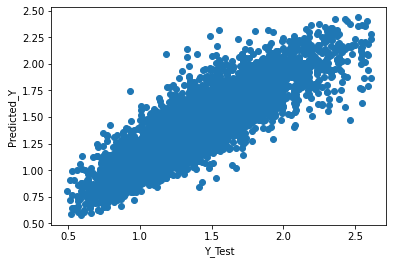

In [90]:
#Checking the difference between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [91]:
import pickle
filename='avocado.pkl'
pickle.dump(KNN,open(filename,'wb'))

In [92]:
#Conclusion
loaded_model=pickle.load(open('avocado.pkl','rb'))
result=loaded_model.score(test_x,test_y)
print(result)

0.8005070199420111
